# Introducción Redes neuronales:

## 🧠 ¿Qué es una red neuronal?

Una red neuronal es un modelo computacional inspirado en el cerebro humano, diseñado para reconocer patrones y aprender de los datos. Está compuesta por unidades llamadas "neuronas artificiales", organizadas en capas:([Google Cloud][1], [Amazon Web Services, Inc.][2])

* **Capa de entrada**: recibe los datos iniciales (como una imagen, texto o número).
* **Capas ocultas**: procesan la información mediante conexiones ponderadas.
* **Capa de salida**: produce el resultado final (por ejemplo, clasificar una imagen como gato o perro).([Amazon Web Services, Inc.][2])

Estas redes se entrenan ajustando las conexiones internas para minimizar errores en las predicciones, un proceso conocido como "aprendizaje supervisado".

---

## 🎥 Video recomendado para principiantes

Para profundizar en este tema:

[Redes Neuronales: Fácil y desde cero](https://www.youtube.com/watch?v=jaEIv_E29sk&utm_source=chatgpt.com)

Este video es ideal para quienes desean comprender los fundamentos sin complicaciones técnicas.

---

Si tienes más preguntas o deseas profundizar en algún aspecto específico, ¡no dudes en preguntar!

[1]: https://cloud.google.com/discover/what-is-a-neural-network?hl=es-419&utm_source=chatgpt.com "¿Qué es una red neuronal y cómo funciona? - Google Cloud"
[2]: https://aws.amazon.com/es/what-is/neural-network/?utm_source=chatgpt.com "¿Qué es una red neuronal? - AWS"


# Entrenamiento de Red Neuronal

En este laboratorio se va a entrenar una red neuronal sencilla para la clasificación de imágenes de Ropa en sus respectivas categorías.

## Objetivos de Aprendizaje

- Familiarizarse con TensorFlow para el entrenamiento de Redes Neuronales
- Recordar los conceptos de Redes Neuronales, Funciones de Costo y Métricas de Evaluación


In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.metrics import SparseCategoricalAccuracy
import matplotlib.pyplot as plt
import numpy as np


# 1. Descarga de Información

La información del Fashion MNIST se encuentra como uno de los DataSets disponibles dentro de TensorFlow. Es posible llamarlo utilizando [`tf.keras.datasets.fashion_mnist`](https://www.tensorflow.org/api_docs/python/tf/keras/datasets/fashion_mnist). Se puede consultar el resto de conjuntos de datos disponibles en [la documentación de TensorFLow](https://www.tensorflow.org/api_docs/python/tf/keras/datasets).

A continuación, cargue la información de Fashion MNIST.

In [3]:
# Carga de FashionMNIST

###
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

###

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [4]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [5]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

El conjunto de datos secompone de 10 clases de ropa para predecir. En la siguiente celda se pueden ver algunos ejemplos de cada categoría.

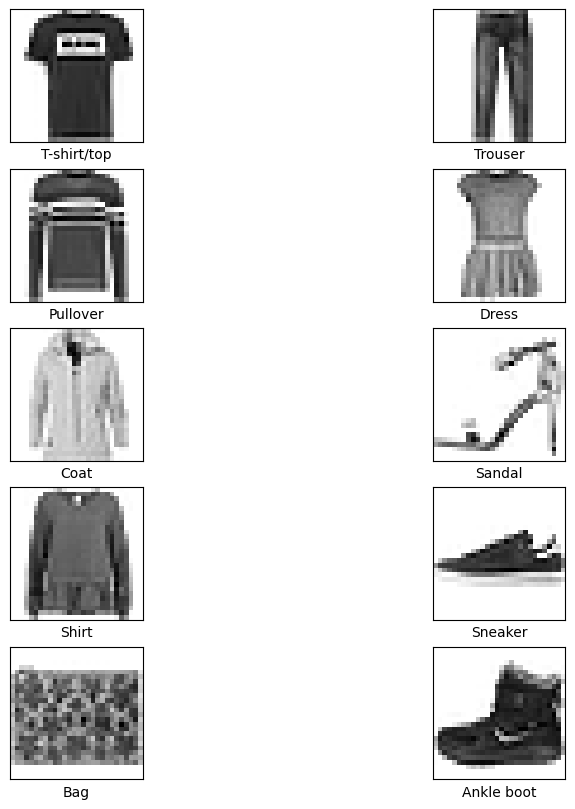

In [6]:
category_indices = [np.where(y_train == i)[0][0] for i in range(10)]
category_labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
# Plot examples
plt.figure(figsize=(10, 10))
for i, index in enumerate(category_indices):
    plt.subplot(5, 2, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[index], cmap=plt.cm.binary)
    plt.xlabel(str(y_train[index]))


    plt.xlabel(category_labels[y_train[index]])
plt.show()

Puede observarse que cada "dato" es una imagen de dimensión 28x28, y que contiene valores de 0 al 255. Donde 0 es un pixel negro, y 255 es un pixel blanco.

In [7]:
x_train.shape

(60000, 28, 28)

In [8]:
x_train[0, :, :].min()

np.uint8(0)

In [9]:
x_train[0, :, :].max()

np.uint8(255)

A continuación procedemos a reescalar los datos, de forma que la intensidad del pixel esté en el intervalo [0, 1].

In [10]:
# Normalize the pixel values
x_train = x_train / 255.0
x_test = x_test / 255.0


In [11]:
x_train.shape[0]

60000

La función a continuación nos va a permitir observar las predicciones de un modelo y determinar qué tanto se equivocó o no.

In [12]:
def show_random_examples(model, x, y, num_examples=10):
    """
    Selección aleatoria de ejemplos y predicciones.

    Params:
    ---------
      model (tf.keras.Model):
        Modelo de Red Neuronal para predicciones

      x (numpy.array):
        Numpy Array con pixeles de la ropa

      y (numpy.array):
        Numpy Array indicando categoría

    """
    # Muestra Aleatorio de índices
    indices = np.random.choice(range(x.shape[0]), num_examples)

    # Obtención de Imágenes y Categorías de Verdad
    images = x[indices]
    true_labels = y[indices]

    # Generar Predicciones del Modelo
    predictions = model.predict(images) # El modelo predice probabilidades
    predicted_labels = np.argmax(predictions, axis=-1) # Se requiere obtener la categoría que maximice esas probabilidad
    predicted_probs = np.max(predictions, axis=-1) # Selección de Probabilidad de categoría ganadora

    # Display the images, true labels, and predicted labels
    plt.figure(figsize=(10, 5))
    for i, (img, true_label, pred_label, prob) in enumerate(zip(images, true_labels, predicted_labels, predicted_probs)):
        plt.subplot(2, num_examples // 2, i + 1)
        plt.imshow(img, cmap='gray')
        plt.axis('off')

        title_color = 'red' if true_label != pred_label else 'black'
        plt.title(f"True: {category_labels[true_label]}\nPredicted: {category_labels[pred_label]} ({prob:.2f})", fontsize=10, color=title_color)
    plt.tight_layout()
    plt.show()

# Call the function to display random examples and their classifications


# 2. Definición del Modelo

A continuación tendrá que definir un modelo de red neuronal como usted considere. Para esto, tiene a su disposición las capas Densas (fully connected layers) que se encuentran en [`tf.keras.layers.Dense`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense). Siéntase libre de explorar con la cantidad de capas ocultas, la cantidad de neuronas, las funciones de activación, etc...

**Nota:** Recuerde que existen 10 categorías de predicción, por lo que debe escoger adecuadamente el número de neuronas de la capa final y la función de activación de la misma. Puede ver las funciones de activación disponibles en [la documentación de TensorFlow](https://www.tensorflow.org/api_docs/python/tf/keras/activations).

In [13]:
28*28

784

In [14]:
### Defina el modelo inicial

model = Sequential([
    Flatten(input_shape=(28, 28)), # No borrar esta
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

###

/home/gonzales06082002/monitoria_python/venv/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
E0000 00:00:1747064892.089281    5575 cuda_executor.cc:1228] INTERNAL: CUDA Runtime error: Failed call to cudaGetRuntimeVersion: Error loading CUDA libraries. GPU will not be used.: Error loading CUDA libraries. GPU will not be used.
W0000 00:00:1747064892.117728    5575 gpu_device.cc:2341] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


La red neuronal se inicializó con unos pesos aleatorios. Este es un modelo que prácticamente está adivinando. A continuación, utilice la función `show_random_examples` para determinar qué tan capaz es el modelo antes de comenzar a aprender.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step


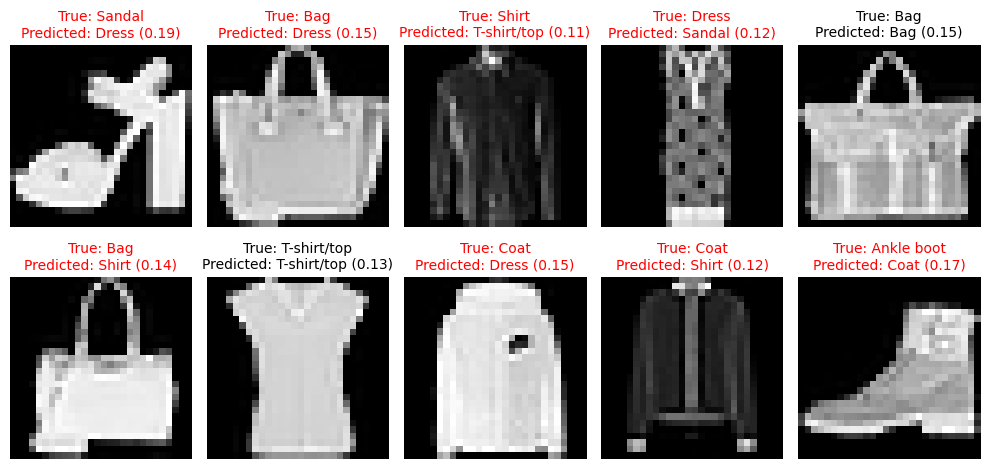

In [15]:
### Utilice la función show_random_examples para mostrar las predicciones en algunos ejemplos en Test
show_random_examples(model, x_train, y_train)
###

Para entrenar el modelo, es necesario definir cuál es el objetivo y cómo se desea hacer. Es por esto que se requiere *compilar* el modelo utilizando el método [`compile`](https://www.tensorflow.org/api_docs/python/tf/keras/Model#compile) del API de Tensorflow.

En este debe definir qué optimizador utilizar, cuál es la función a minimizar y qué métricas de seguimiento se van a evaluar.

**Nota:** Debido al formato de los datos, se utilizará la función de pérdida [`SparseCategoricalCrossentropy`](https://www.tensorflow.org/api_docs/python/tf/keras/losses/SparseCategoricalCrossentropy) e igualmente la [`SparseCategoricalAccuracy`](https://www.tensorflow.org/api_docs/python/tf/keras/metrics/SparseCategoricalAccuracy).

**Nota 2:** Se recomienda utilizar [`Adam`](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam) como el optimizador, pero se recomienda probar los otros optimizadores disponibles en [la documentación de TensorFlow](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers).

In [16]:
### Compile el modelo utilizando Sparce Categorical Crossentropy y Accuracy
model.compile(
    optimizer=Adam(learning_rate=0.001), ## Pruebe otros Optimizadores
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()]
)

###


# 3. Entrenamiento de Modelo

Una vez definida la estructura del modelo y el objetivo de entrenamiento, se puede proceder a entrenar. Se utilizará el método `fit` del modelo. Pruebe probar otros batchsizes.

In [17]:
model_history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)


Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - loss: 0.6617 - sparse_categorical_accuracy: 0.7671 - val_loss: 0.3864 - val_sparse_categorical_accuracy: 0.8596
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 0.3781 - sparse_categorical_accuracy: 0.8612 - val_loss: 0.3622 - val_sparse_categorical_accuracy: 0.8693
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.3395 - sparse_categorical_accuracy: 0.8732 - val_loss: 0.3604 - val_sparse_categorical_accuracy: 0.8660
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - loss: 0.3073 - sparse_categorical_accuracy: 0.8866 - val_loss: 0.3295 - val_sparse_categorical_accuracy: 0.8817
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - loss: 0.2893 - sparse_categorical_accuracy: 0.8929 - val_loss: 0.3395 - val_sparse_categorical_accuracy: 0.8763
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - loss: 0.2771 - sparse_categorical_accuracy: 0.8956 - val_loss: 0.3327 - val_sparse_categorical_accuracy

Una vez entrenado el modelo, se procede a revisar sus predicciones en la base de datos de tes.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


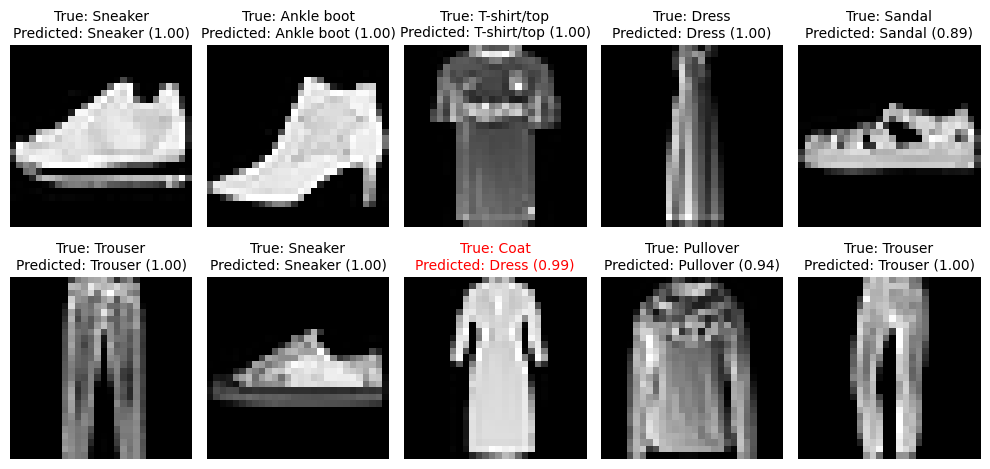

In [18]:
show_random_examples(model, x_test, y_test)

A continuación, utilice el método [`evaluate`](https://www.tensorflow.org/api_docs/python/tf/keras/Model#evaluate) para determinar el desempeño del modelo en Test.

In [19]:
###
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_accuracy}")

###


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3391 - sparse_categorical_accuracy: 0.8845
Test accuracy: 0.8834999799728394


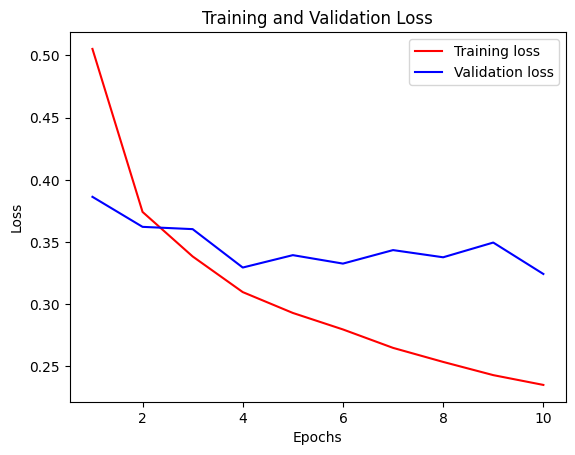

In [20]:
def plot_training_and_validation_loss(model_history):
    loss = model_history.history['loss']
    val_loss = model_history.history['val_loss']
    epochs = range(1, len(loss) + 1)

    plt.plot(epochs, loss, 'r', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Training and Validation Loss')
    plt.show()

# Call the function to plot the training and validation loss
plot_training_and_validation_loss(model_history)


# (Opcional) Early Stopping

Una de las técnicas más importantes para evitar que un modelo haga overfitting, es utilizar el Early Stopping. Este método consiste en monitorear la pérdida del modelo en validación y detener el entrenamiento si esta métrica deja de mejorar consecutivamente.

A continuación utilizará el Callback de EarlyStopping [`tf.keras.callbacks.EarlyStopping`]() para entrenar la red lo más posible evitando hacer overfitting.

Para esto volveremos a crear un modelo nuevo, que no haya aprendido nada aún. Utilizaremos el código del modelo que se definió anteriormente.

In [21]:
### Copie el código de su modelo inicial

model_early = Sequential([
    Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

###

### No olvide compilarlo
model_early.compile(
    optimizer=Adam(learning_rate=0.001), ## Pruebe otros Optimizadores
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()]
)

###


In [22]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)


In [23]:
model_early_history = model_early.fit(x_train, y_train, epochs=100, batch_size=32, validation_split=0.2, callbacks=[early_stopping])


Epoch 1/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 0.8112 - sparse_categorical_accuracy: 0.6932 - val_loss: 0.4242 - val_sparse_categorical_accuracy: 0.8522
Epoch 2/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.4160 - sparse_categorical_accuracy: 0.8519 - val_loss: 0.3846 - val_sparse_categorical_accuracy: 0.8633
Epoch 3/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.3719 - sparse_categorical_accuracy: 0.8659 - val_loss: 0.3831 - val_sparse_categorical_accuracy: 0.8602
Epoch 4/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 0.3357 - sparse_categorical_accuracy: 0.8795 - val_loss: 0.3649 - val_sparse_categorical_accuracy: 0.8666
Epoch 5/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 0.3148 - sparse_categorical_accuracy: 0.8845 - val_loss: 0.3474 - val_sparse_categorical_accuracy: 0.8786
Epoch 6/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 0.3048 - sparse_categorical_accuracy: 0.8883 - val_loss: 0.3315 - val_sparse_categorical_acc

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


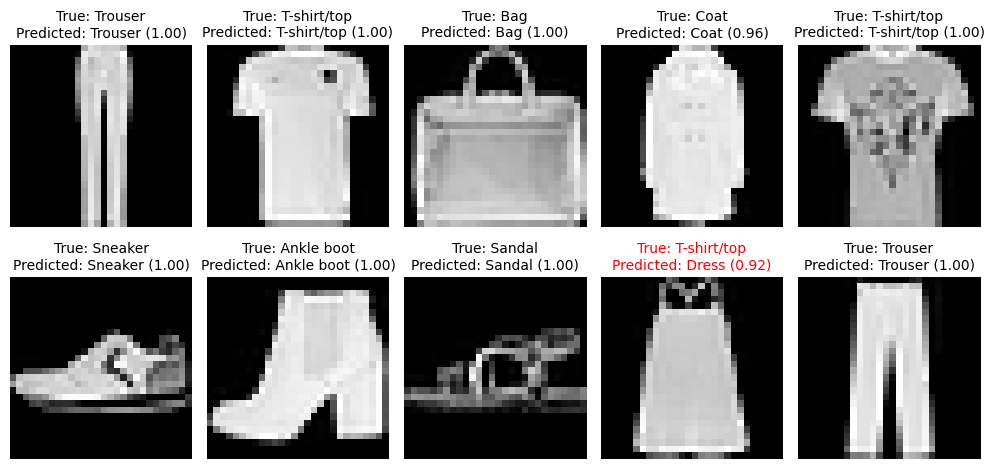

In [24]:
show_random_examples(model_early, x_test, y_test)

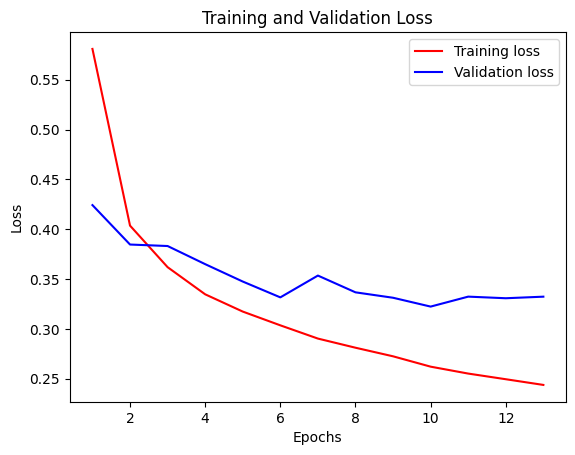

In [25]:
plot_training_and_validation_loss(model_early_history)

In [26]:
###
test_loss, test_accuracy = model_early.evaluate(x_test, y_test)
print(f"Test accuracy: {test_accuracy}")

###


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3469 - sparse_categorical_accuracy: 0.8784
Test accuracy: 0.8762000203132629
